[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


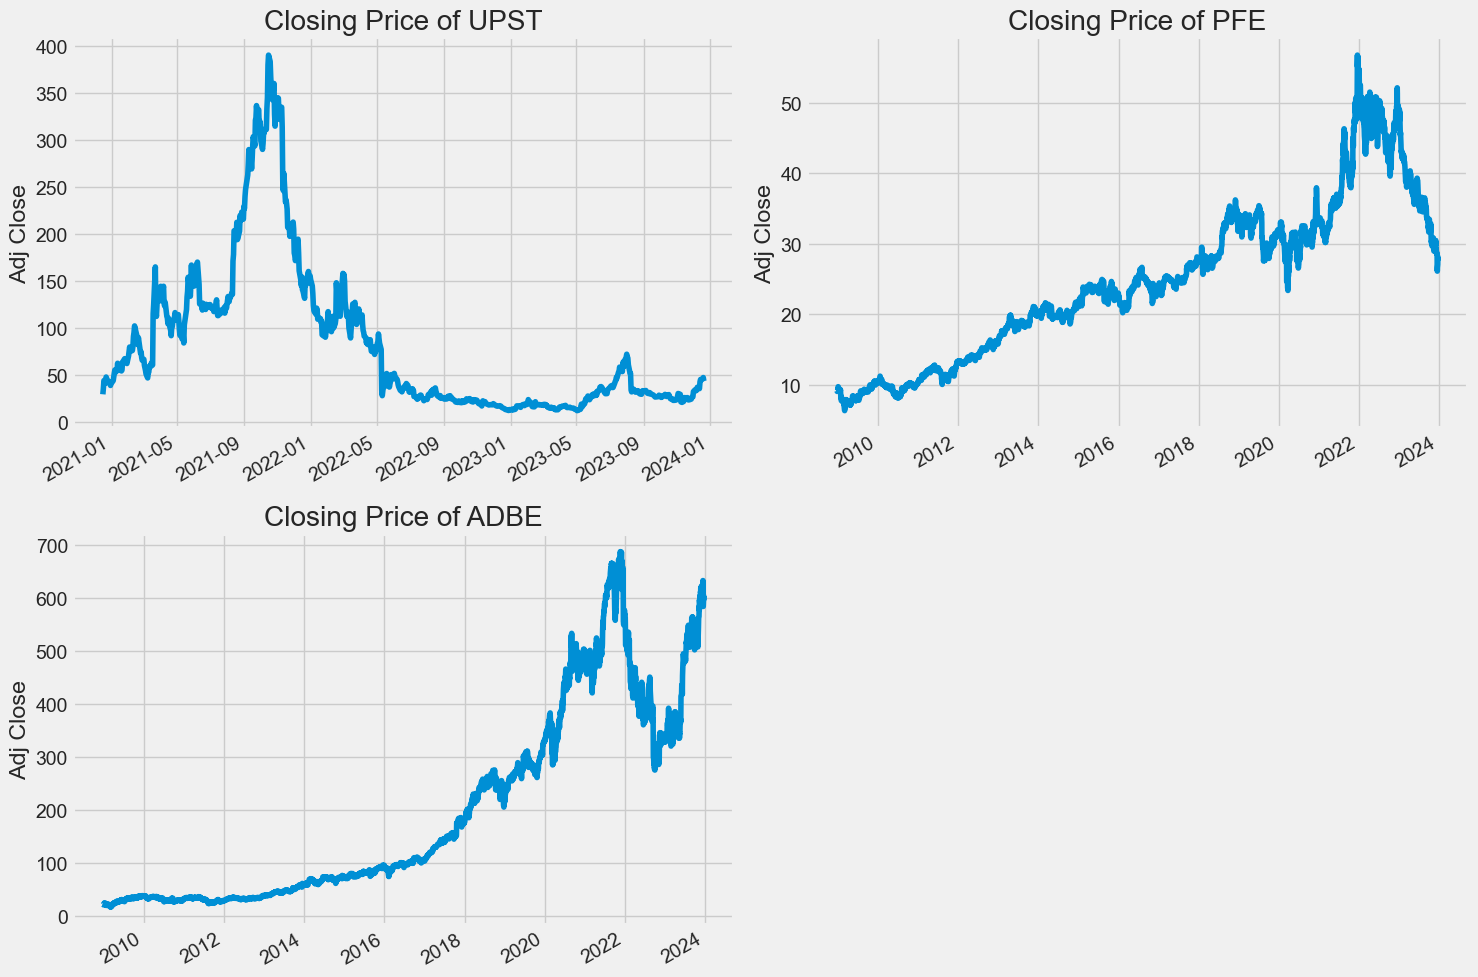

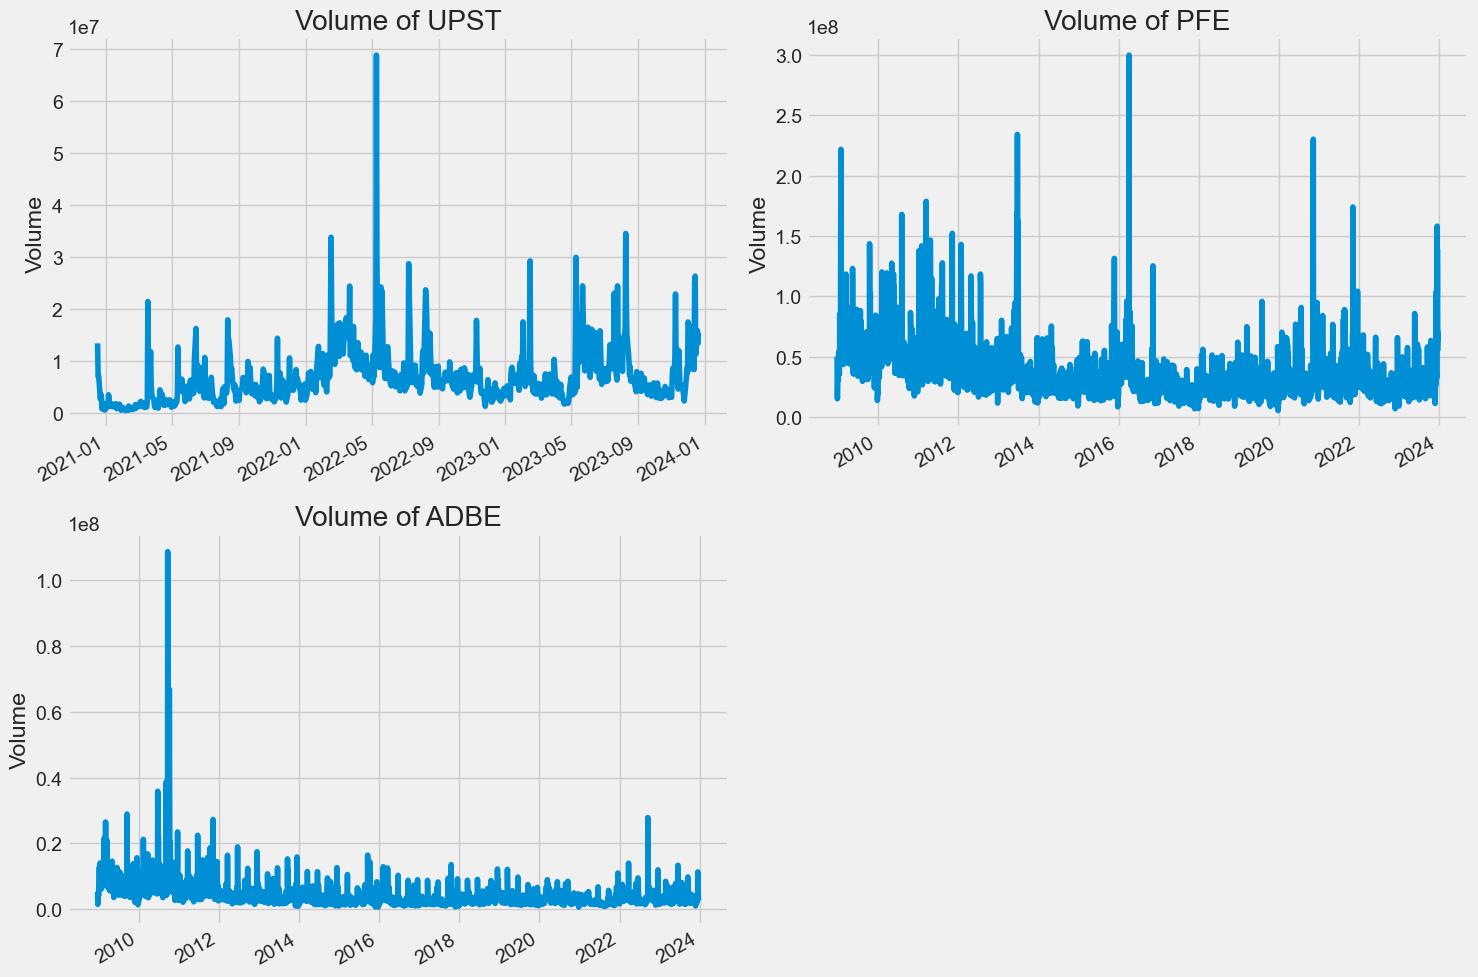

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import pandas_datareader as pdr
pdr.get_data_fred('GS5')
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime
tech_list = ['UPST','PFE','ADBE']
tech_list = ['UPST','PFE','ADBE']
end = datetime.now()
start = datetime(end.year - 15, end.month,end.day)
for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
company_list = [UPST,PFE,ADBE]
company_name = ['UPSTART HOLDINGS INC','PFIZER','ADOBE']
for company, com_name in zip(company_list, company_name):
    company = {}
    ##TO convert str to data frames so that progmm. can be executed.
    company["company_name"] =com_name
    df = pd.concat(company_list, axis=0)
df.tail(10)
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume of {tech_list[i - 1]}")
    
plt.tight_layout()

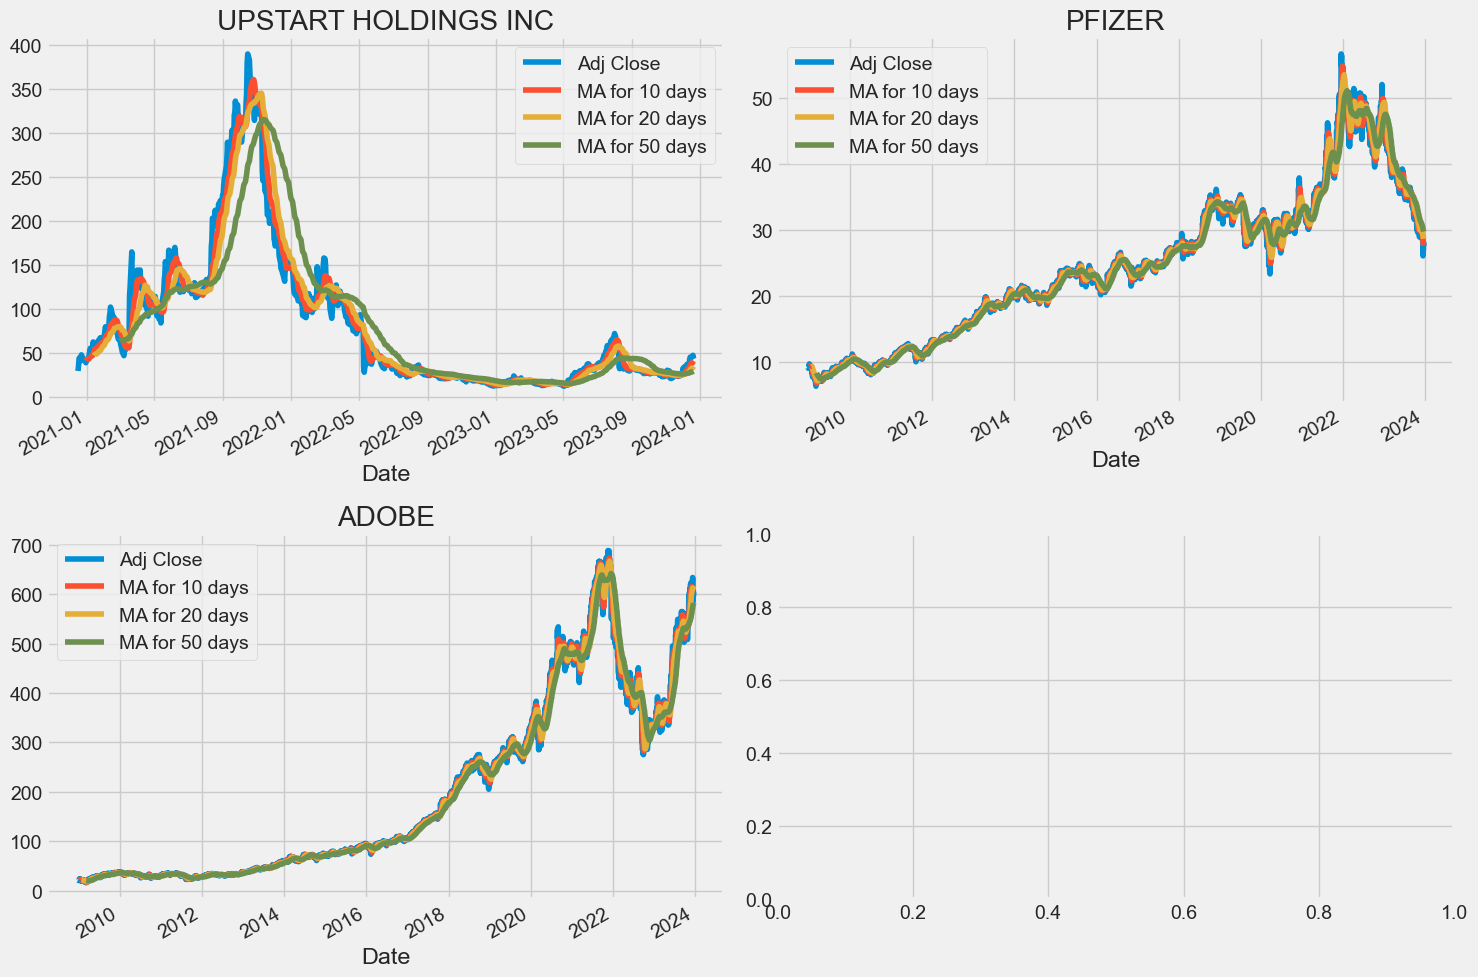

In [2]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

UPST[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('UPSTART HOLDINGS INC')
PFE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('PFIZER')
ADBE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('ADOBE')
fig.tight_layout()

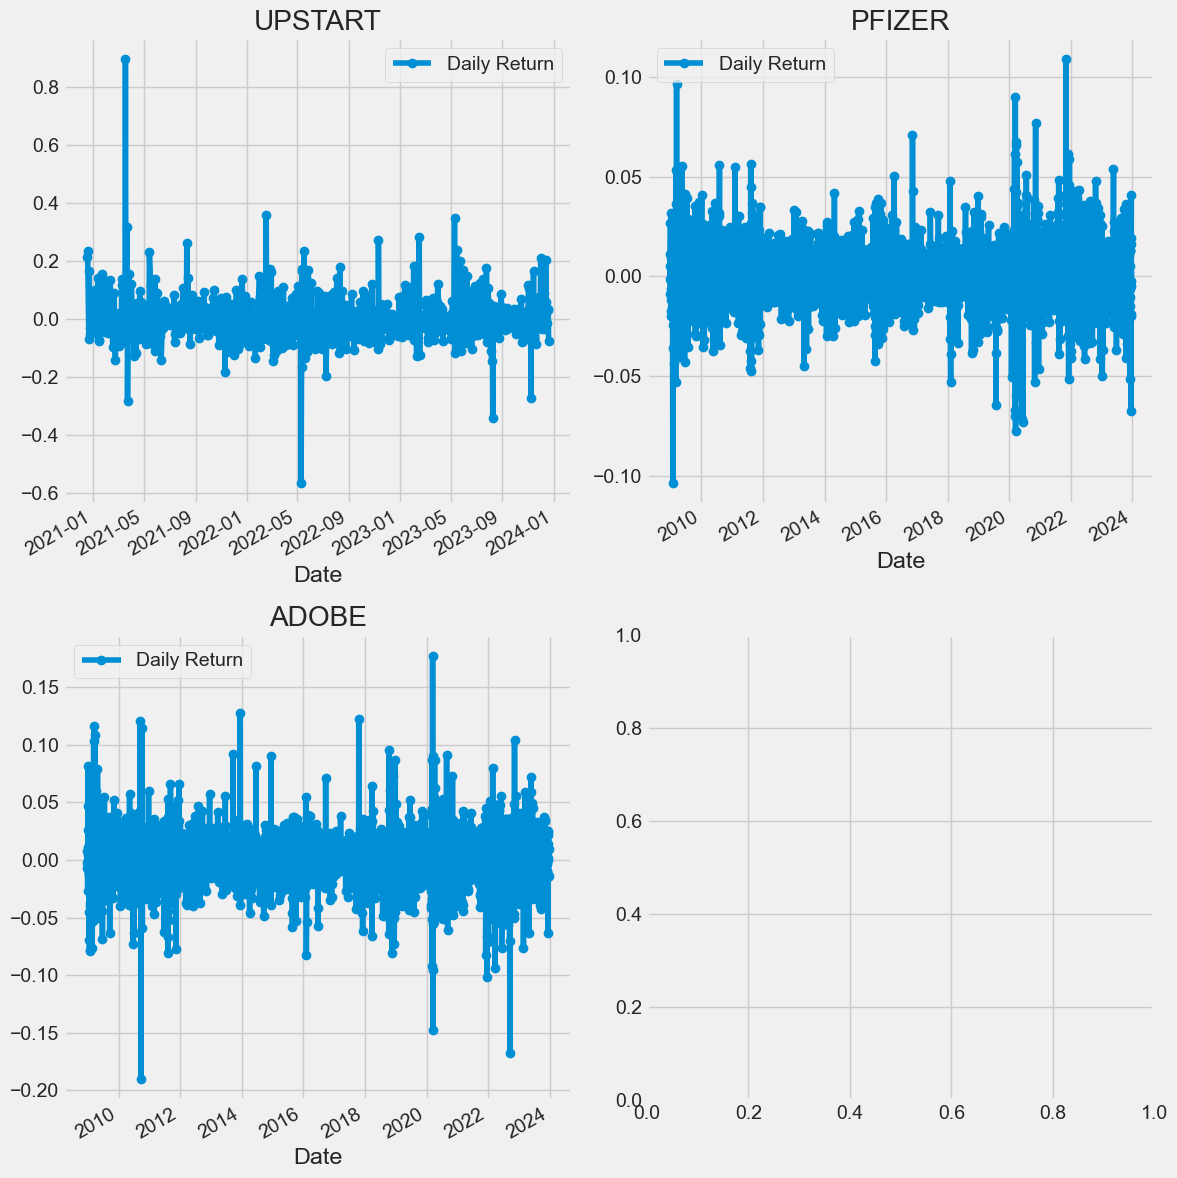

In [3]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(12)
fig.set_figwidth(12)

UPST['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='-', marker='o')
axes[0,0].set_title('UPSTART')
PFE['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='-', marker='o')
axes[0,1].set_title('PFIZER')
ADBE['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='-', marker='o')
axes[1,0].set_title('ADOBE')
fig.tight_layout()


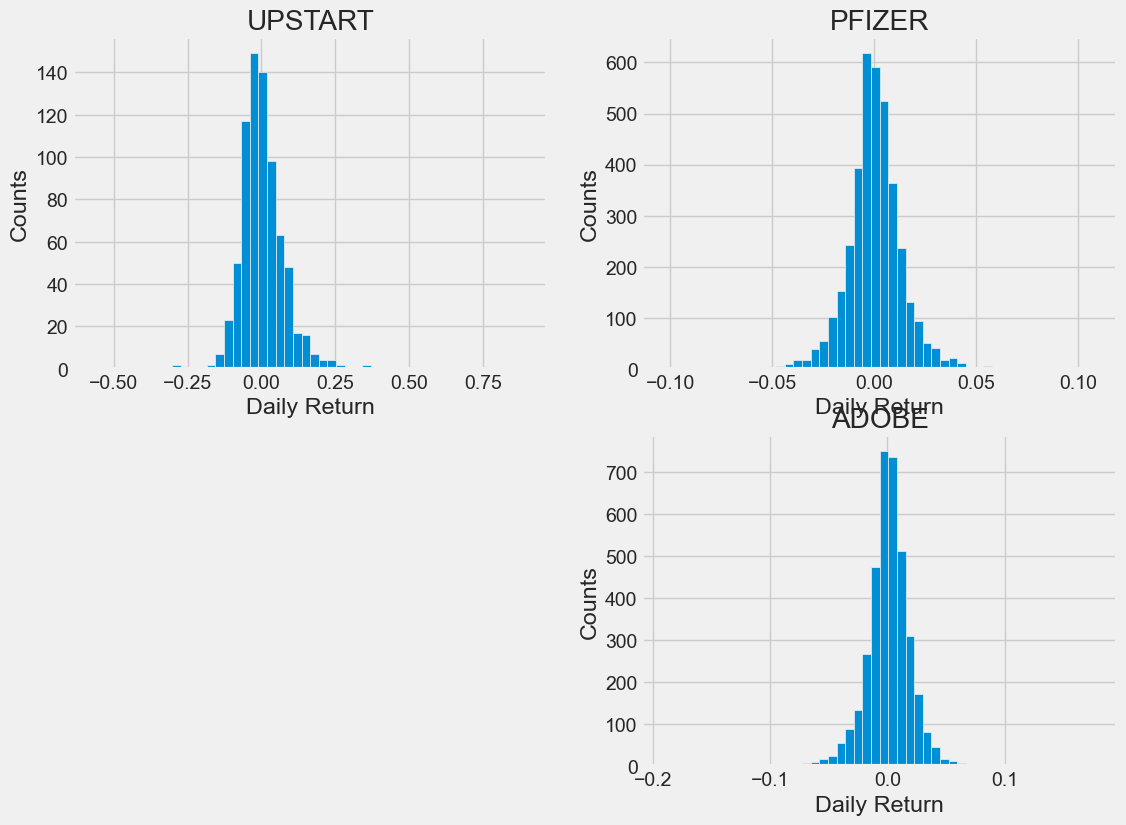

In [4]:
plt.figure(figsize = (12,9))
plt.subplot(2,2,1)
UPST['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('UPSTART')
plt.subplot(2,2,2)
PFE['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('PFIZER')
plt.subplot(2,2,4)
ADBE['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title('ADOBE')
fig.tight_layout()

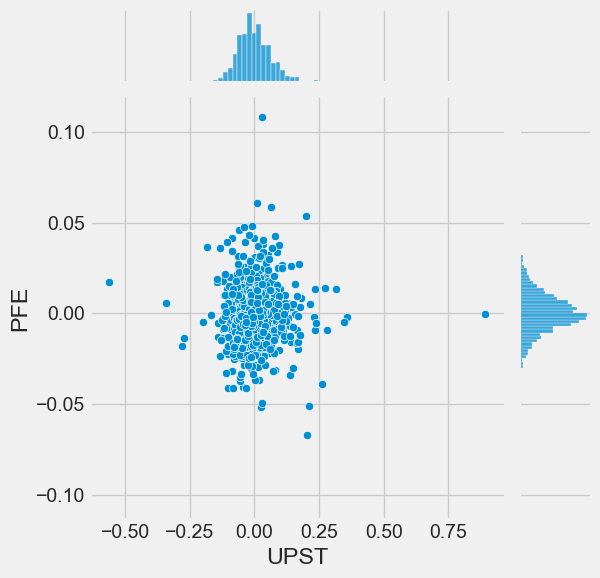

In [7]:
sns.jointplot(x='UPST', y='PFE', data=tech_rets, kind='scatter')

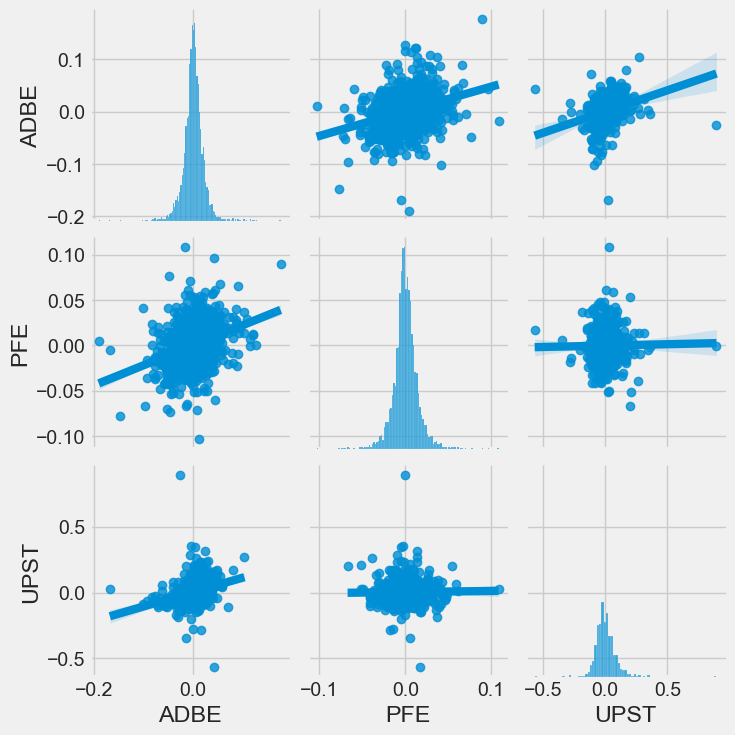

In [8]:
sns.pairplot(tech_rets, kind='reg')

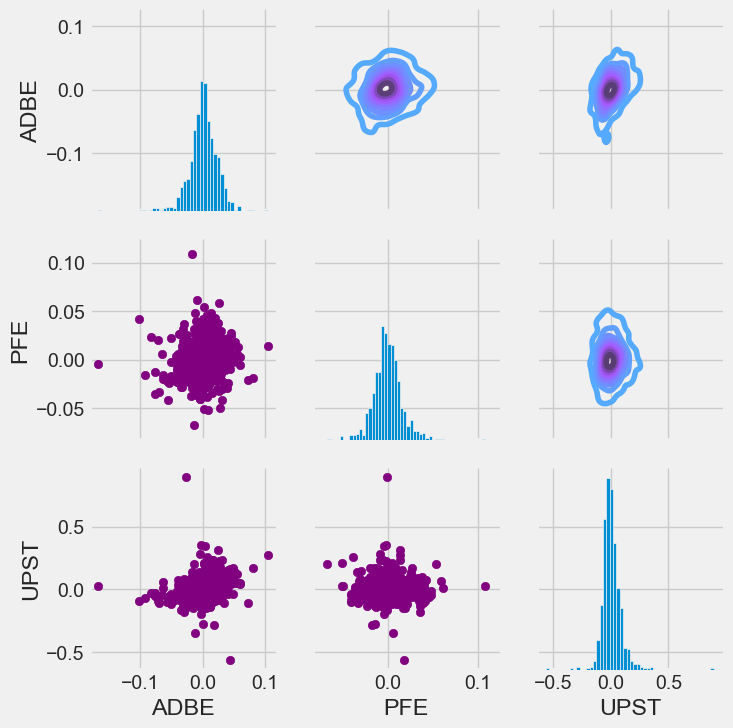

In [9]:
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_lower(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_upper(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=50)

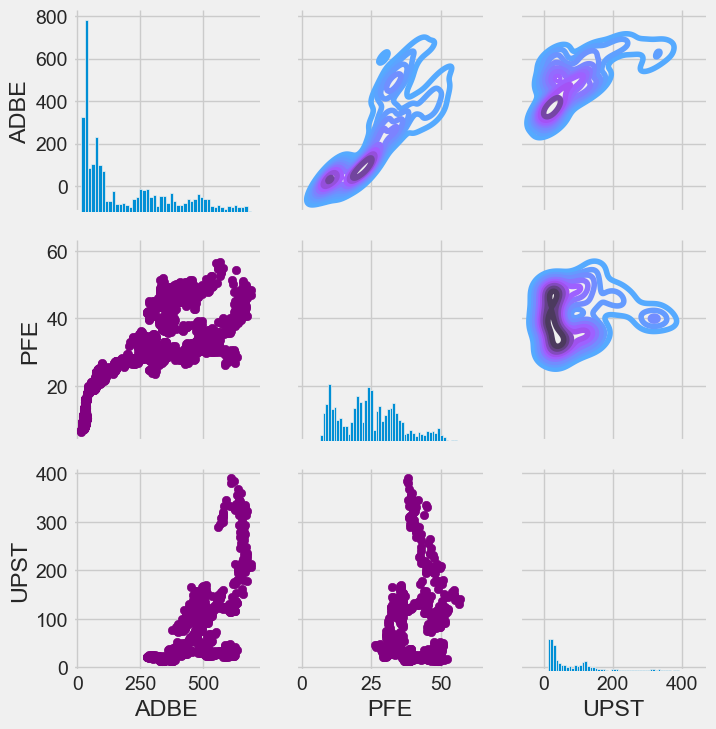

In [10]:
return_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_lower(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_upper(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=50)

Text(0.5, 1.0, 'Correlation of closing price')

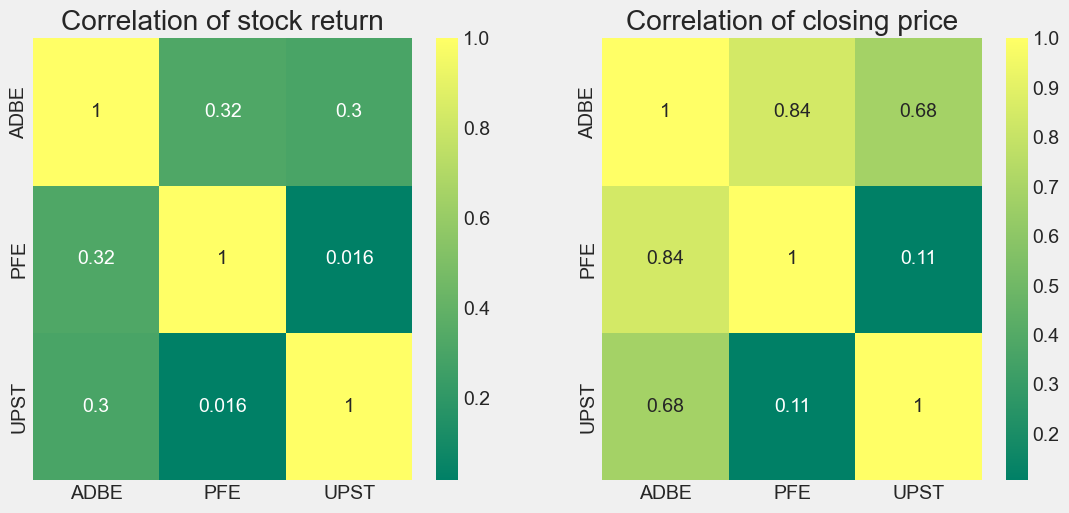

In [11]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')
plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of closing price')


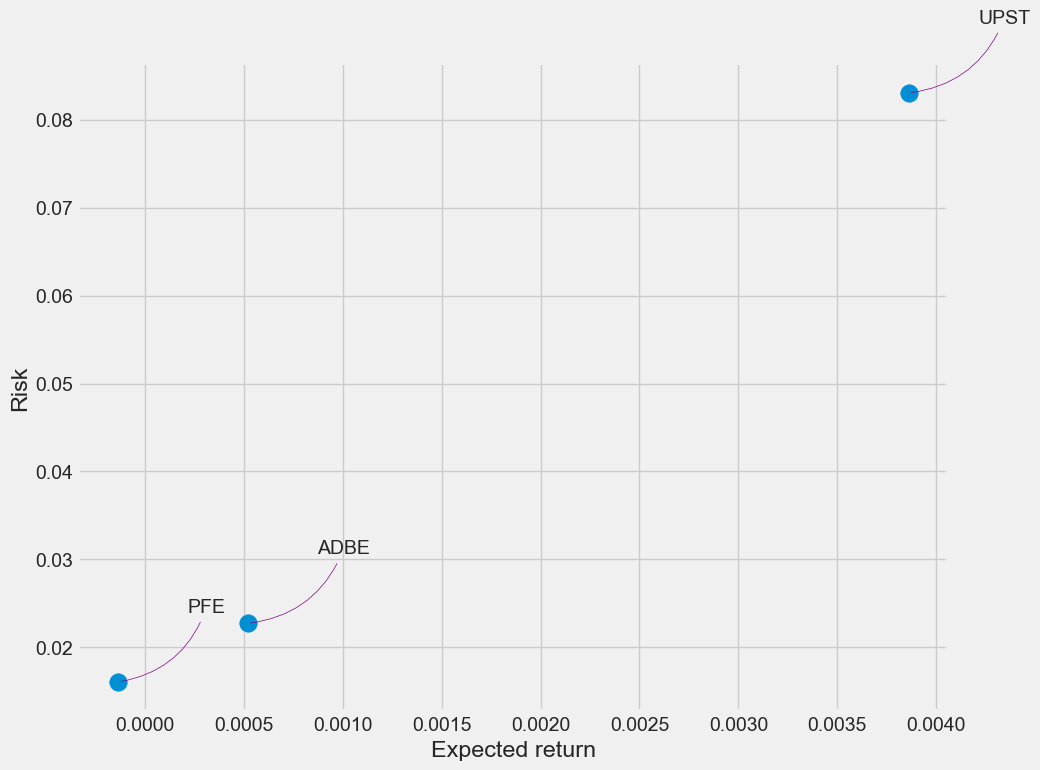

In [12]:
rets = tech_rets.dropna()

area = np.pi * 50 ## this helps indicating the size of the point.

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    ## the inbuilt function annotate is used for shaping the given graph.
    ## arrowprops : The properties used to draw a `.FancyArrowPatch` arrow between the positions *xy* and *xytext*. 
    ## texcoords :  For showing single or two-tuple of str.
    ## ha and va : they are used to specify the orientation of the line around the dot.
    ## , ha='left', va='top'
    plt.annotate(label, xy=(x, y), xytext=(50,50), textcoords='offset points',
                 arrowprops=dict(arrowstyle='-', color='purple', connectionstyle='arc3,rad=-0.3'))
    

In [13]:
# Get the stock quote
df = pdr.get_data_yahoo('ADBE', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,28.700001,29.010000,28.510000,28.570000,28.570000,4495100
2012-01-04,28.500000,28.590000,28.040001,28.280001,28.280001,3852400
2012-01-05,28.070000,28.620001,28.049999,28.480000,28.480000,2999500
2012-01-06,28.370001,28.790001,28.139999,28.719999,28.719999,5781700
2012-01-09,28.760000,28.830000,28.440001,28.530001,28.530001,3514700
...,...,...,...,...,...,...
2023-12-14,593.000000,593.159973,578.299988,584.640015,584.640015,11315300
2023-12-15,580.599976,591.659973,578.200012,584.679993,584.679993,8663700
2023-12-18,591.520020,603.130005,586.619995,599.130005,599.130005,5452000


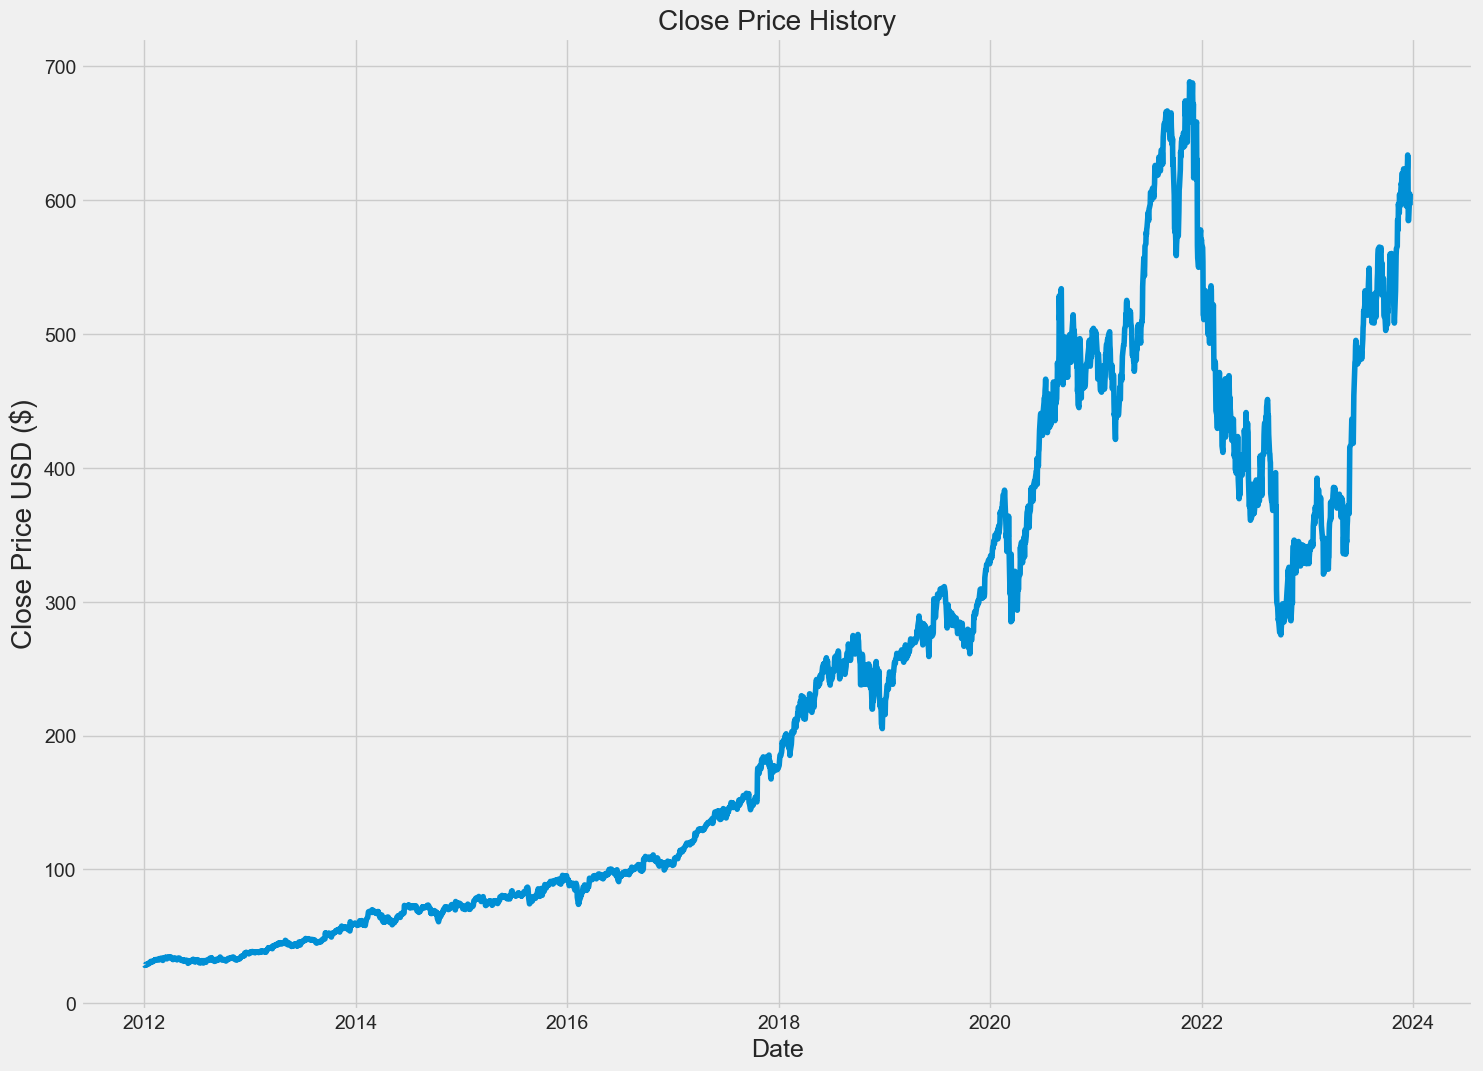

In [14]:
plt.figure(figsize=(16,12))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()


In [15]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2862

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.39332531e-04],
       [0.00000000e+00],
       [3.02987255e-04],
       ...,
       [8.64806328e-01],
       [8.73153689e-01],
       [8.60155436e-01]])

In [17]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    # The append() function in Python is used to add elements to the end of a list
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        # Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00043933, 0.        , 0.00030299, 0.00066657, 0.00037874,
       0.00139375, 0.00157554, 0.0014392 , 0.00104531, 0.00162099,
       0.00243906, 0.00296929, 0.00336318, 0.00295414, 0.0040449 ,
       0.00463573, 0.00439334, 0.0041964 , 0.00412065, 0.0040449 ,
       0.00448424, 0.00455998, 0.00540835, 0.0054235 , 0.00605978,
       0.00578709, 0.00662031, 0.00595373, 0.00616582, 0.00630217,
       0.00633247, 0.00693845, 0.0067718 , 0.00645367, 0.00613553,
       0.00710509, 0.00777167, 0.00755957, 0.00755957, 0.00698389,
       0.00730203, 0.00825645, 0.00748383, 0.00562044, 0.00625672,
       0.00722629, 0.0081201 , 0.00799891, 0.00899877, 0.00831705,
       0.00892302, 0.00839279, 0.0094381 , 0.00739293, 0.00799891,
       0.00822615, 0.00837765, 0.00927146, 0.0096199 , 0.00936236])]
[0.00939265692239366]

[array([0.00043933, 0.        , 0.00030299, 0.00066657, 0.00037874,
       0.00139375, 0.00157554, 0.0014392 , 0.00104531, 0.00162099,
       0.00243906, 0.00296929, 0.00

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)





2802/2802 [==============================] - 40s 14ms/step - loss: 0.0016


In [20]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 0s 13ms/step


15.846215448396835

C:\Users\Ajay\AppData\Local\Temp\ipykernel_12388\1765463356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


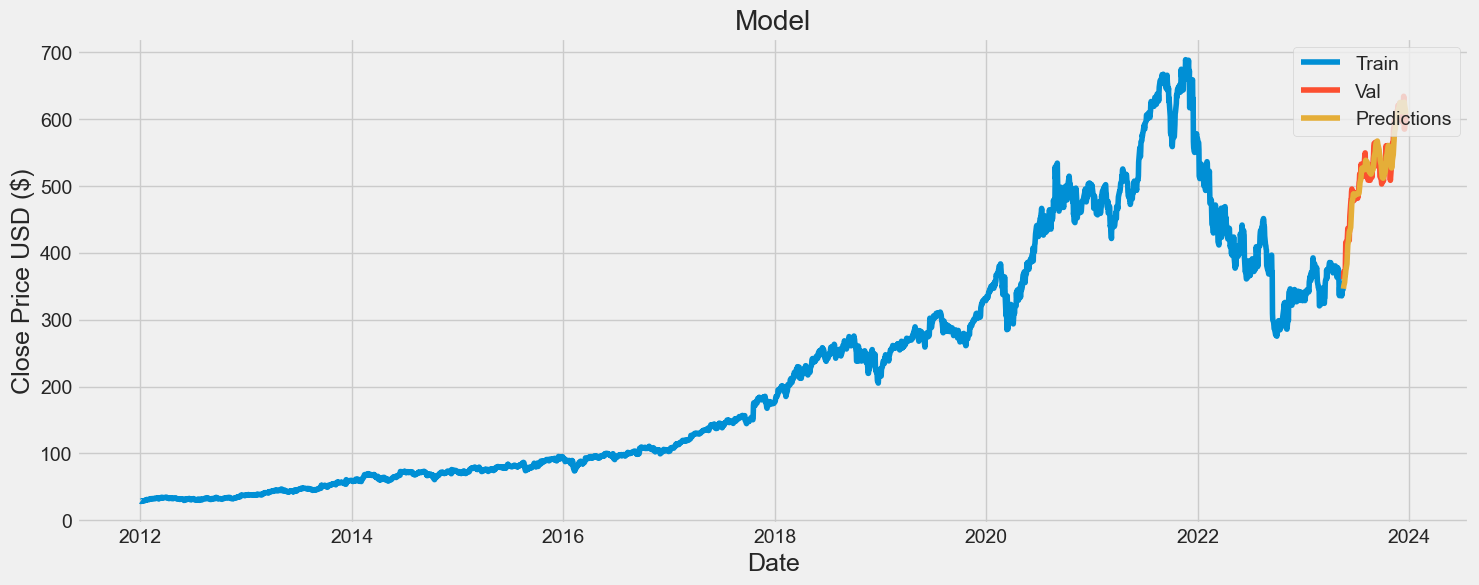

In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

In [22]:
valid
## accuracy is of 96.05%

,Close,Predictions
Date,,
2023-05-18,360.429993,346.124390
2023-05-19,371.250000,350.043854
2023-05-22,372.049988,355.689667
2023-05-23,370.420013,361.278168
2023-05-24,365.760010,365.624847
...,...,...
2023-12-14,584.640015,624.819885
2023-12-15,584.679993,620.320435
2023-12-18,599.130005,613.104065


In [23]:
# Get the stock quote
df = pdr.get_data_yahoo('PFE', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,20.740038,20.872866,20.721064,20.844402,13.416261,53124340
2012-01-04,20.796965,20.825426,20.635674,20.654650,13.294128,31912485
2012-01-05,20.607210,20.607210,20.294119,20.493359,13.190314,52764821
2012-01-06,20.607210,20.664137,20.455408,20.464895,13.171996,31613571
2012-01-09,20.455408,20.721064,20.407970,20.702087,13.324663,41786041
...,...,...,...,...,...,...
2023-12-14,26.760000,27.320000,26.010000,26.129999,26.129999,101889800
2023-12-15,26.129999,26.990000,26.080000,26.629999,26.629999,138338500
2023-12-18,26.920000,27.299999,26.719999,27.059999,27.059999,63329400


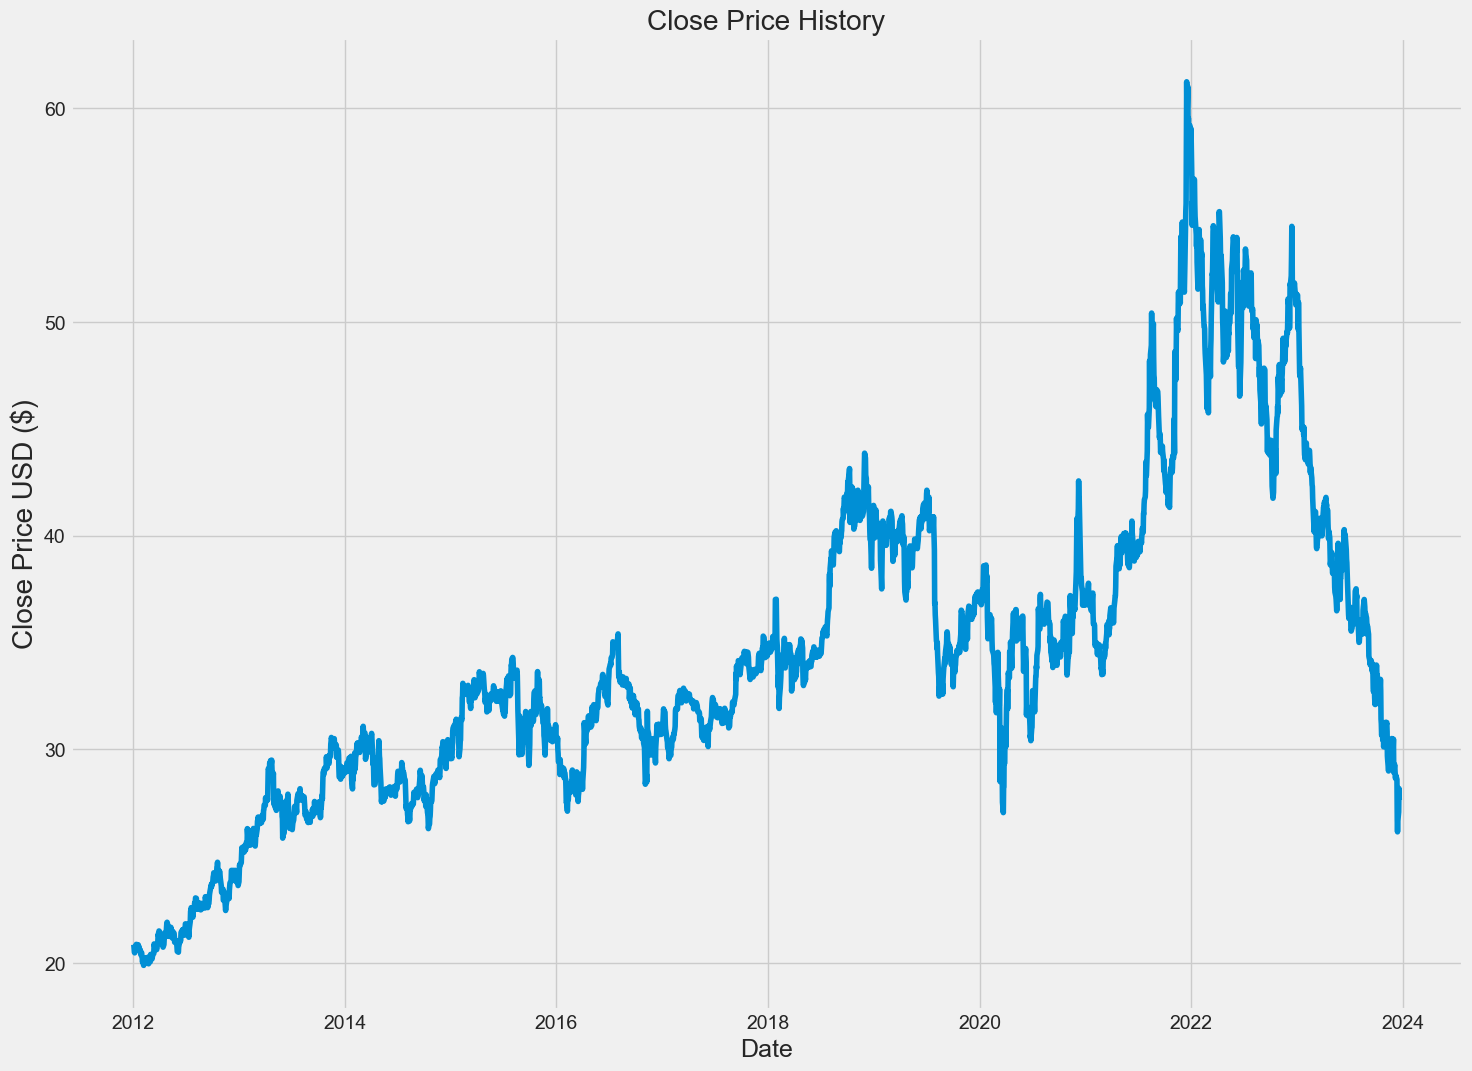

In [24]:
plt.figure(figsize=(16,12))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()


In [25]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2862

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0233905 ],
       [0.01880415],
       [0.01490571],
       ...,
       [0.17362243],
       [0.20020961],
       [0.18739941]])

In [27]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    # The append() function in Python is used to add elements to the end of a list
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        # Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0233905 , 0.01880415, 0.01490571, 0.01421775, 0.01995072,
       0.02270253, 0.02178526, 0.02384915, 0.02040938, 0.02270253,
       0.0233905 , 0.02040938, 0.02178526, 0.01742822, 0.01628164,
       0.01765752, 0.01559368, 0.01215391, 0.01444706, 0.01031932,
       0.00825547, 0.00366913, 0.00573297, 0.        , 0.0022932 ,
       0.00137593, 0.00435709, 0.0022932 , 0.00802617, 0.00871413,
       0.00366913, 0.00871413, 0.00550366, 0.00619163, 0.0094021 ,
       0.00183459, 0.00527436, 0.0071089 , 0.00619163, 0.00412774,
       0.01238321, 0.01054867, 0.01261252, 0.0073382 , 0.0096314 ,
       0.01169525, 0.01215391, 0.01352983, 0.02430776, 0.02247323,
       0.02201457, 0.02270253, 0.0213266 , 0.01949206, 0.01880415,
       0.01788683, 0.01995072, 0.02774754, 0.03554435, 0.03348051])]
[0.033709814874421595]

[array([0.0233905 , 0.01880415, 0.01490571, 0.01421775, 0.01995072,
       0.02270253, 0.02178526, 0.02384915, 0.02040938, 0.02270253,
       0.0233905 , 0.02040938, 0.0

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2802/2802 [==============================] - 40s 14ms/step - loss: 0.0012


In [29]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

5/5 [==============================] - 1s 14ms/step


C:\Users\Ajay\AppData\Local\Temp\ipykernel_12388\1640223445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


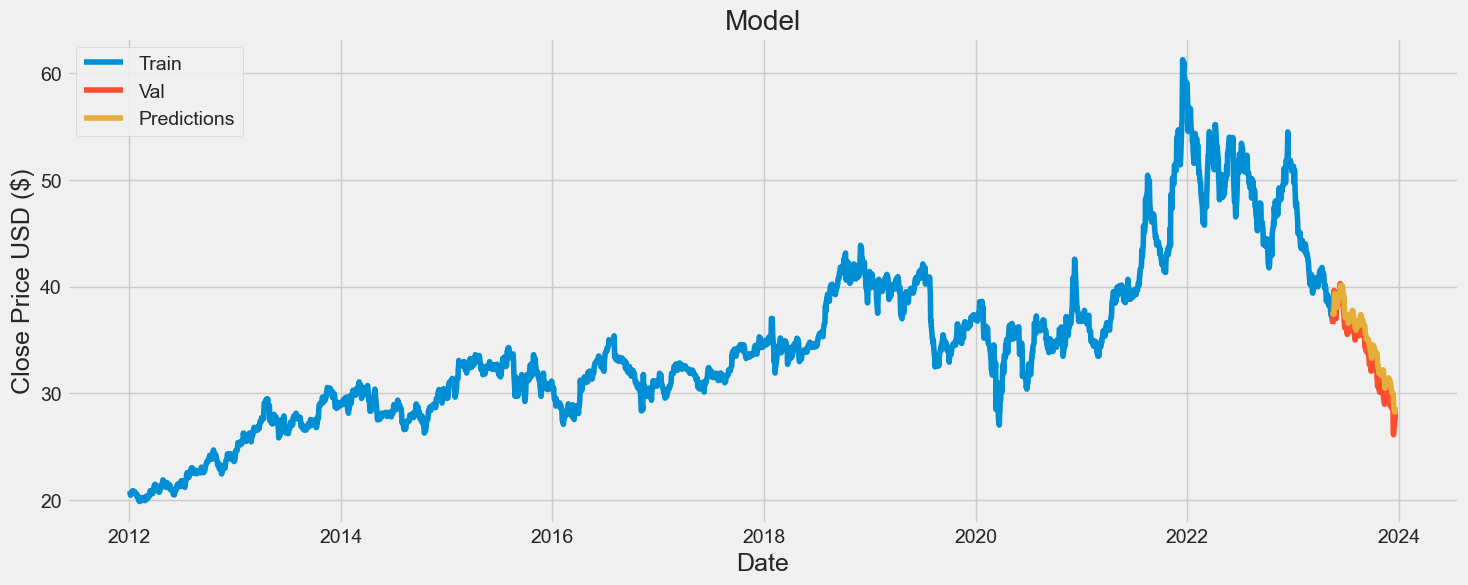

In [30]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()

In [32]:
valid
## accuracy is of 96.814%

,Close,Predictions
Date,,
2023-05-18,36.480000,37.641743
2023-05-19,36.770000,37.442921
2023-05-22,38.750000,37.418743
2023-05-23,39.639999,38.136307
2023-05-24,38.630001,39.093552
...,...,...
2023-12-14,26.129999,29.342087
2023-12-15,26.629999,28.605486
2023-12-18,27.059999,28.239990
